In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json

Se importan las librerías necesarias tales como:

- Pandas: Para la manipulación y análisis de datos con los DataFrames.
- Numpy: Para los cálculos matemáticos y el manejo eficiente de los arrays.
- RandomForestClassifier de sklearn.ensemble: Para realizar tareas de clasificación con el algoritmo de aprendizaje de bosques aleatorios.

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

Utilizamos estos csv ya que se encuentran preprocesados.

In [3]:
train = pd.read_csv('train2.csv')
test = pd.read_csv('test2.csv')

Visualizamos como están estructurados los datos.

In [4]:
train.head()

,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,...,"('licenciatura en pedagogia infantil',)","('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
0,1,7.0,2.0,4.0,8.0,Si,Si,N,Si,Si,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
1,1,5.0,1.0,4.0,9.0,Si,No,N,Si,No,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
2,1,5.0,5.0,4.0,7.0,Si,No,N,No,Si,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1
3,1,6.0,1.0,5.0,2.0,Si,No,N,Si,Si,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
4,1,5.0,4.0,4.0,5.0,Si,Si,N,Si,Si,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1


In [5]:
test.head()

,ID,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,FAMI_TIENECOMPUTADOR,...,"('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,ESTU_PAGOMATRICULAPROPIO_no info,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
0,550236,0,2.0,2.0,4.0,9.0,Si,No,N,Si,...,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1
1,98545,1,5.0,4.0,3.0,7.0,Si,No,N,Si,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,1
2,499179,1,4.0,1.0,4.0,6.0,Si,No,N,Si,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,1
3,782980,0,4.0,4.0,2.0,4.0,Si,No,N,No,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
4,785185,1,5.0,3.0,3.0,7.0,Si,No,N,Si,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1


Visualizamos las columnas e identificamos las variables disponibles y verificamos que estén correctamente nombradas.

In [6]:
train.columns

Index(['ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
       'ESTU_PRIVADO_LIBERTAD', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1',
       'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2',
       'coef_3', 'coef_4', '('administracion de empresas',)',
       '('administracion en salud ocupacional',)',
       '('administracion financiera',)', '('arquitectura',)',
       '('comunicacion social',)', '('contaduria publica',)', '('derecho',)',
       '('economia',)', '('enfermeria',)', '('ingenieria ambiental',)',
       '('ingenieria civil',)', '('ingenieria de sistemas',)',
       '('ingenieria electronica',)', '('ingenieria industrial',)',
       '('ingenieria mecanica',)', '('licenciatura en pedagogia infantil',)',
       '('medicina',)', '('negocios internacionales',)', '('otros',)',
       '('psicologia',)', '('trabajo social

In [7]:
test.columns

Index(['ID', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
       'ESTU_PRIVADO_LIBERTAD', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1',
       'FAMI_EDUCACIONMADRE', 'coef_1', 'coef_2', 'coef_3', 'coef_4',
       '('administracion de empresas',)',
       '('administracion en salud ocupacional',)',
       '('administracion financiera',)', '('arquitectura',)',
       '('comunicacion social',)', '('contaduria publica',)', '('derecho',)',
       '('economia',)', '('enfermeria',)', '('ingenieria ambiental',)',
       '('ingenieria civil',)', '('ingenieria de sistemas',)',
       '('ingenieria electronica',)', '('ingenieria industrial',)',
       '('ingenieria mecanica',)', '('licenciatura en pedagogia infantil',)',
       '('medicina',)', '('negocios internacionales',)', '('otros',)',
       '('psicologia',)', '('trabajo social',)', 'ESTU_PAGO

Creamos el dataframe X eliminando la columna RENDIMIENTO GLOBAL.

In [8]:
X = train.drop('RENDIMIENTO_GLOBAL', axis = 1)

Realizamos una inspección de las caracteristicass seleccionadas para aregurarnos de que no se incluya la variable objetivo (Rendimiento Global)

In [9]:
X.shape

(686002, 40)

In [11]:
X = X.drop(columns=[

                    'ESTU_PRIVADO_LIBERTAD',
                    'FAMI_TIENELAVADORA',
                    'FAMI_TIENEAUTOMOVIL',
                    'FAMI_TIENECOMPUTADOR',
                    'FAMI_TIENEINTERNET.1'
                    ])

In [13]:
X.head()

,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4,...,"('licenciatura en pedagogia infantil',)","('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
0,1,7.0,2.0,4.0,8.0,12.0,0.322,0.208,0.310,0.267,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
1,1,5.0,1.0,4.0,9.0,8.0,0.311,0.215,0.292,0.264,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
2,1,5.0,5.0,4.0,7.0,7.0,0.297,0.214,0.305,0.264,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1
3,1,6.0,1.0,5.0,2.0,7.0,0.485,0.172,0.252,0.190,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
4,1,5.0,4.0,4.0,5.0,5.0,0.316,0.232,0.285,0.294,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1


In [15]:
X.columns

Index(['ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'coef_1', 'coef_2',
       'coef_3', 'coef_4', '('administracion de empresas',)',
       '('administracion en salud ocupacional',)',
       '('administracion financiera',)', '('arquitectura',)',
       '('comunicacion social',)', '('contaduria publica',)', '('derecho',)',
       '('economia',)', '('enfermeria',)', '('ingenieria ambiental',)',
       '('ingenieria civil',)', '('ingenieria de sistemas',)',
       '('ingenieria electronica',)', '('ingenieria industrial',)',
       '('ingenieria mecanica',)', '('licenciatura en pedagogia infantil',)',
       '('medicina',)', '('negocios internacionales',)', '('otros',)',
       '('psicologia',)', '('trabajo social',)', 'ESTU_PAGOMATRICULAPROPIO_No',
       'ESTU_PAGOMATRICULAPROPIO_Si', 'FAMI_TIENEINTERNET_No',
       'FAMI_TIENEINTERNET_Si'],
      dtype='object')

Extrae los valores de la columna RENDIMIENTO GLOBAL y los almacena en el array y, ya que este contiene las etiquetas con las que el modelo va a aprender.

In [16]:
y = train['RENDIMIENTO_GLOBAL'].values

Nos aseguramos de que no hayan datos repetidos o faltantes en X y Y

In [17]:
np.unique(X)

array([0.00e+00, 1.00e-03, 2.00e-03, 3.00e-03, 4.00e-03, 5.00e-03,
       6.00e-03, 7.00e-03, 8.00e-03, 9.00e-03, 1.00e-02, 1.10e-02,
       1.20e-02, 1.30e-02, 1.40e-02, 1.50e-02, 1.60e-02, 1.70e-02,
       1.80e-02, 1.90e-02, 2.00e-02, 2.10e-02, 2.20e-02, 2.30e-02,
       2.40e-02, 2.50e-02, 2.60e-02, 2.70e-02, 2.80e-02, 2.90e-02,
       3.00e-02, 3.10e-02, 3.20e-02, 3.30e-02, 3.40e-02, 3.50e-02,
       3.60e-02, 3.70e-02, 3.80e-02, 3.90e-02, 4.00e-02, 4.10e-02,
       4.20e-02, 4.30e-02, 4.40e-02, 4.50e-02, 4.60e-02, 4.70e-02,
       4.80e-02, 4.90e-02, 5.00e-02, 1.02e-01, 1.03e-01, 1.04e-01,
       1.05e-01, 1.06e-01, 1.07e-01, 1.08e-01, 1.09e-01, 1.10e-01,
       1.11e-01, 1.12e-01, 1.13e-01, 1.14e-01, 1.15e-01, 1.16e-01,
       1.17e-01, 1.18e-01, 1.19e-01, 1.20e-01, 1.21e-01, 1.22e-01,
       1.23e-01, 1.24e-01, 1.25e-01, 1.26e-01, 1.27e-01, 1.28e-01,
       1.29e-01, 1.30e-01, 1.31e-01, 1.32e-01, 1.33e-01, 1.34e-01,
       1.35e-01, 1.36e-01, 1.37e-01, 1.38e-01, 1.39e-01, 1.40e

In [18]:
np.unique(y)

array([1., 2., 3., 4.])

Creamos el dataframe Xtest eliminando columnas que consideramos irrelevantes como ID y datos con no info. Mejorando la calidad del modelo eliminando ruido.

In [19]:
Xtest = test.drop(['ID', 'ESTU_PAGOMATRICULAPROPIO_no info'], axis = 1)

In [20]:
Xtest = Xtest.drop(columns=['ESTU_PRIVADO_LIBERTAD',
                    'FAMI_TIENELAVADORA',
                    'FAMI_TIENEAUTOMOVIL',
                    'FAMI_TIENECOMPUTADOR',
                    'FAMI_TIENEINTERNET.1'])

Procedemos a inspeccionar las filas, columnas, dimensiones y valores unicos para validar que las modificaciones realizadas se guardaron correctamente.

In [21]:
Xtest.head()

,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4,...,"('licenciatura en pedagogia infantil',)","('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
0,0,2.0,2.0,4.0,9.0,5.0,0.328,0.219,0.317,0.247,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1
1,1,5.0,4.0,3.0,7.0,9.0,0.227,0.283,0.296,0.324,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1
2,1,4.0,1.0,4.0,6.0,7.0,0.285,0.228,0.294,0.247,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1
3,0,4.0,4.0,2.0,4.0,4.0,0.160,0.408,0.217,0.294,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
4,1,5.0,3.0,3.0,7.0,7.0,0.209,0.283,0.306,0.286,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1


In [22]:
Xtest.columns

Index(['ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'coef_1', 'coef_2',
       'coef_3', 'coef_4', '('administracion de empresas',)',
       '('administracion en salud ocupacional',)',
       '('administracion financiera',)', '('arquitectura',)',
       '('comunicacion social',)', '('contaduria publica',)', '('derecho',)',
       '('economia',)', '('enfermeria',)', '('ingenieria ambiental',)',
       '('ingenieria civil',)', '('ingenieria de sistemas',)',
       '('ingenieria electronica',)', '('ingenieria industrial',)',
       '('ingenieria mecanica',)', '('licenciatura en pedagogia infantil',)',
       '('medicina',)', '('negocios internacionales',)', '('otros',)',
       '('psicologia',)', '('trabajo social',)', 'ESTU_PAGOMATRICULAPROPIO_No',
       'ESTU_PAGOMATRICULAPROPIO_Si', 'FAMI_TIENEINTERNET_No',
       'FAMI_TIENEINTERNET_Si'],
      dtype='object')

In [23]:
Xtest.shape

(296786, 35)

In [24]:
np.unique(Xtest)

array([0.00e+00, 1.00e-03, 2.00e-03, 3.00e-03, 4.00e-03, 5.00e-03,
       6.00e-03, 7.00e-03, 8.00e-03, 9.00e-03, 1.00e-02, 1.10e-02,
       1.20e-02, 1.30e-02, 1.40e-02, 1.50e-02, 1.60e-02, 1.70e-02,
       1.80e-02, 1.90e-02, 2.00e-02, 2.10e-02, 2.20e-02, 2.30e-02,
       2.40e-02, 2.50e-02, 2.60e-02, 2.70e-02, 2.80e-02, 2.90e-02,
       3.00e-02, 3.10e-02, 3.20e-02, 3.30e-02, 3.40e-02, 3.50e-02,
       3.60e-02, 3.70e-02, 3.80e-02, 3.90e-02, 4.00e-02, 4.10e-02,
       4.20e-02, 4.30e-02, 4.40e-02, 4.50e-02, 4.60e-02, 4.70e-02,
       4.80e-02, 4.90e-02, 5.00e-02, 1.01e-01, 1.02e-01, 1.03e-01,
       1.04e-01, 1.05e-01, 1.06e-01, 1.07e-01, 1.08e-01, 1.09e-01,
       1.10e-01, 1.11e-01, 1.12e-01, 1.13e-01, 1.14e-01, 1.15e-01,
       1.16e-01, 1.17e-01, 1.18e-01, 1.19e-01, 1.20e-01, 1.21e-01,
       1.22e-01, 1.23e-01, 1.24e-01, 1.25e-01, 1.26e-01, 1.27e-01,
       1.28e-01, 1.29e-01, 1.30e-01, 1.31e-01, 1.32e-01, 1.33e-01,
       1.34e-01, 1.35e-01, 1.36e-01, 1.37e-01, 1.38e-01, 1.39e

Realizamos una partición en los datos de entrenamiento para evaluar el rendimiento del modelo.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
test_size = 0.3

Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=test_size)
print (Xtr.shape, Xts.shape)

(480201, 35) (205801, 35)


In [27]:
Xtr.head()

,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4,...,"('licenciatura en pedagogia infantil',)","('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
463441,1,2.0,3.0,3.0,4.0,4.0,0.246,0.290,0.272,0.282,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
235119,0,2.0,4.0,3.0,4.0,4.0,0.245,0.318,0.261,0.319,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,1
621018,1,4.0,5.0,5.0,5.0,5.0,0.478,0.159,0.254,0.190,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,1
639722,1,4.0,5.0,5.0,2.0,9.0,0.441,0.171,0.254,0.200,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
506567,1,4.0,2.0,5.0,7.0,7.0,0.438,0.179,0.249,0.217,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,1


In [28]:
Xts.head()

,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4,...,"('licenciatura en pedagogia infantil',)","('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
146714,1,3.0,1.0,2.0,9.0,5.0,0.171,0.411,0.250,0.283,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1
567809,1,5.0,5.0,3.0,11.0,7.0,0.214,0.288,0.293,0.303,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
541094,0,2.0,0.0,0.0,0.0,0.0,0.042,0.044,0.031,0.007,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
624764,0,4.0,5.0,3.0,12.0,11.0,0.216,0.300,0.276,0.298,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
340164,1,2.0,0.0,0.0,6.0,7.0,0.032,0.016,0.024,0.010,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0


Especificamos parámetros para mejorar el control del modelo y evitar un sobreentrenamiento.

In [29]:
estimator = RandomForestClassifier(random_state=0, max_depth=10, criterion="log_loss")

In [30]:
estimator.fit(Xtr, ytr)

RandomForestClassifier(criterion='log_loss', max_depth=10, random_state=0)

Evaluamos el desempeño del modelo y detectamos posibles sobreajustes o subajustes.

In [31]:
estimator.score(Xtr, ytr), estimator.score(Xts,yts)


(0.40711701974798054, 0.3969611420741396)

In [32]:
predicciones = estimator.predict(Xtest)

In [33]:
predicciones = np.round(predicciones)

Inspeccionamos el tamaño y contenido de las predicciones

In [34]:
len(predicciones)

296786

In [35]:
predicciones[:10]

array([1., 3., 4., 1., 2., 1., 4., 4., 2., 3.])

Visualizamos los valores predichos para un análisis inicial

In [36]:
import matplotlib.pyplot as plt

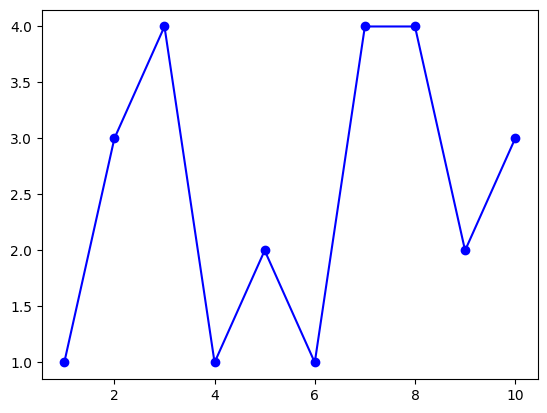

In [37]:
plt.plot(range(1, 11), predicciones[:10], 'b-o')

Traduce las predicciones numéricas en etiquetas compresibles para realizar un buen análisis

In [38]:
idTest = pd.DataFrame(test["ID"])


In [39]:
Reference = [' ','bajo', 'medio-bajo', 'medio-alto', 'alto']
y_preditionReference = [Reference[int(i)] for i in predicciones]

idTest['RENDIMIENTO_GLOBAL'] = pd.Series(y_preditionReference, name='RENDIMIENTO_GLOBAL')

In [40]:
idTest.head()

,ID,RENDIMIENTO_GLOBAL
0,550236,bajo
1,98545,medio-alto
2,499179,alto
3,782980,bajo
4,785185,medio-bajo


In [41]:
idTest.shape

(296786, 2)

In [42]:
idTest.to_csv('submissionDt.csv', index = False)

In [43]:
!head submissionDt.csv

ID,RENDIMIENTO_GLOBAL
550236,bajo
98545,medio-alto
499179,alto
782980,bajo
785185,medio-bajo
58495,bajo
705444,alto
557548,alto
519909,medio-bajo


In [ ]:
!kaggle competitions submit -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia -f submissionDt.csv -m "Envío de predicciones usando un DecissionTreeClassifier con preprocesado sin departamento"